Chapter 6 - Non Linear Modeling, Question 6

## (a)

In [93]:
library(ISLR)

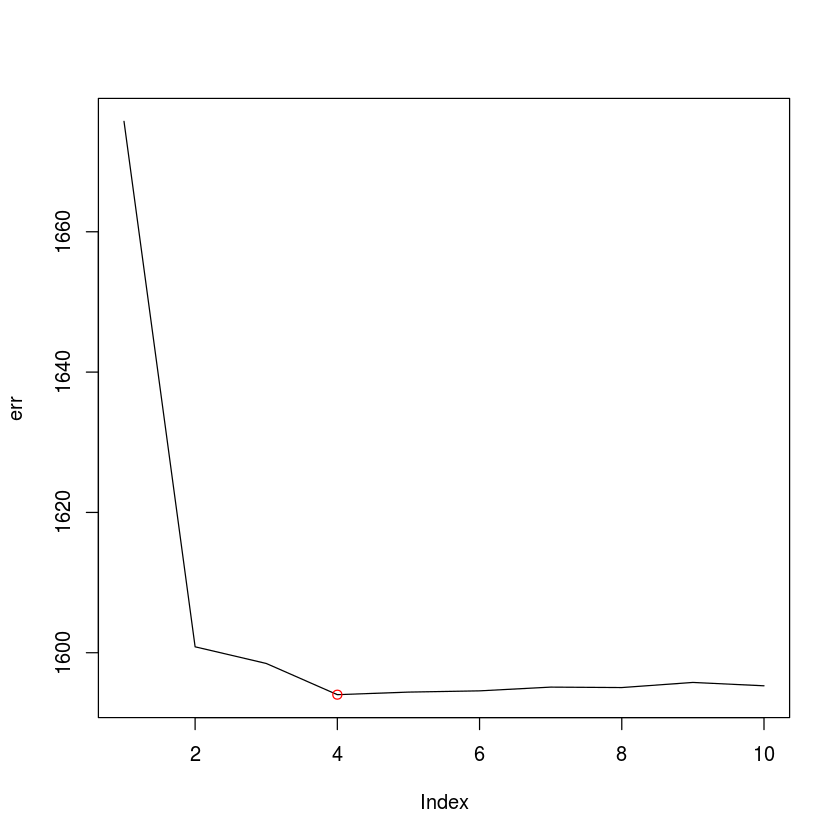

In [94]:
set.seed(1)
library(boot)
err = rep(NA,10)
for(i in 1:10){
    glm.model = glm(wage~poly(age,i),data=Wage)
    err[i]= cv.glm(Wage,glm.model,K=10)$delta[2]
}
plot(err,type="l")
min_point = which.min(err)
points(min_point,err[min_point],col="red")

According to the 10-fold cross validation, the polynomial with 4 degree polynomial gives the least error.

In [95]:
lm.model1 = lm(wage~poly(age,1),data=Wage)
lm.model2 = lm(wage~poly(age,2),data=Wage)
lm.model3 = lm(wage~poly(age,3),data=Wage)
lm.model4 = lm(wage~poly(age,4),data=Wage)
lm.model5 = lm(wage~poly(age,5),data=Wage)
lm.model6 = lm(wage~poly(age,6),data=Wage)
lm.model7 = lm(wage~poly(age,7),data=Wage)
lm.model8 = lm(wage~poly(age,8),data=Wage)
lm.model9 = lm(wage~poly(age,9),data=Wage)
lm.model10 = lm(wage~poly(age,10),data=Wage)
anova(lm.model1,lm.model2,lm.model3,lm.model4,lm.model5,lm.model6,lm.model7,lm.model8,lm.model9,lm.model10)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
2998,5022216,NA,NA,NA,NA
2997,4793430,1,2.287860e+05,1.437638e+02,2.187330e-32
2996,4777674,1,1.575569e+04,9.900512e+00,1.668583e-03
2995,4771604,1,6.070152e+03,3.814342e+00,5.090874e-02
2994,4770322,1,1.282563e+03,8.059328e-01,3.693978e-01
2993,4766389,1,3.932258e+03,2.470939e+00,1.160744e-01
2992,4763834,1,2.555281e+03,1.605679e+00,2.051989e-01
2991,4763707,1,1.266690e+02,7.959584e-02,7.778654e-01
2990,4756703,1,7.004317e+03,4.401350e+00,3.599425e-02
2989,4756701,1,2.637537e+00,1.657367e-03,9.675292e-01


According to the ANOVA test the all the models greater than degree 3 are insignificant.

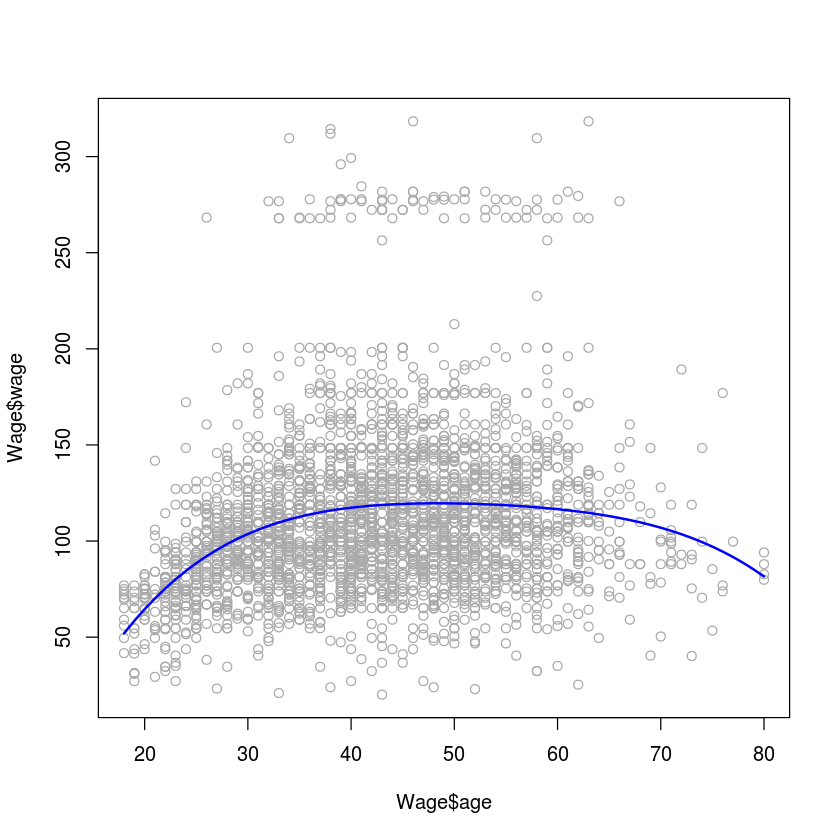

In [102]:
age.limits = range(Wage$age)
age.range = seq(age.limits[1],age.limits[2])
glm.model = glm(wage~poly(age,4),data=Wage)
glm.pred = predict(glm.model,newdata=list(age=age.range))
plot(Wage$age,Wage$wage,col="darkgrey")
lines(age.range,glm.pred,col="blue",lwd=2)

## (b)

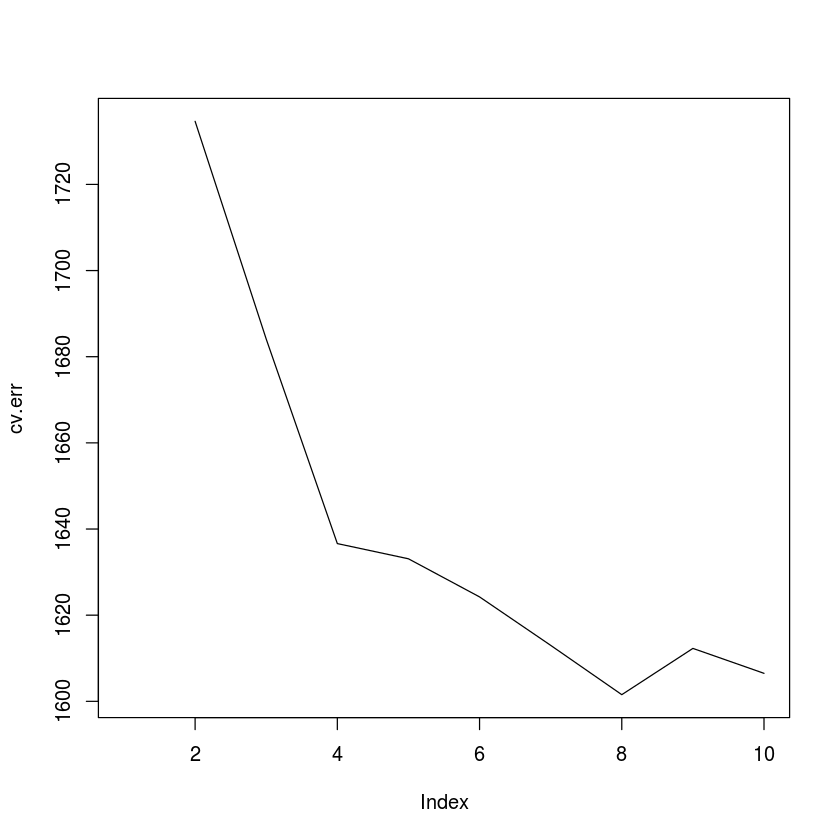

In [89]:
#Using k-fold cross validation using a manual method. (Refer below for R's inbuit function for cross validation)
library(ISLR)
set.seed(1)
k=10
folds = sample(1:k,nrow(Wage),replace=TRUE)
cv.err = c()
for(cp in 2:10){
    err = c()
    for(i in 1:k){
        Wage$cuts = cut(Wage$age,cp)
        lm.model = lm(wage~cuts,data=Wage[folds!=i,])
        lm.pred = predict(lm.model,newdata=Wage[folds==i,])
        err[i]=mean((lm.pred-Wage[folds==i,]$wage)^2)
    }
    cv.err[cp]=mean(err)
}
plot(cv.err,type="l")

According to the 10 fold cross validation we have concluded that a step function with 8 cutpoints gives the lowest error.

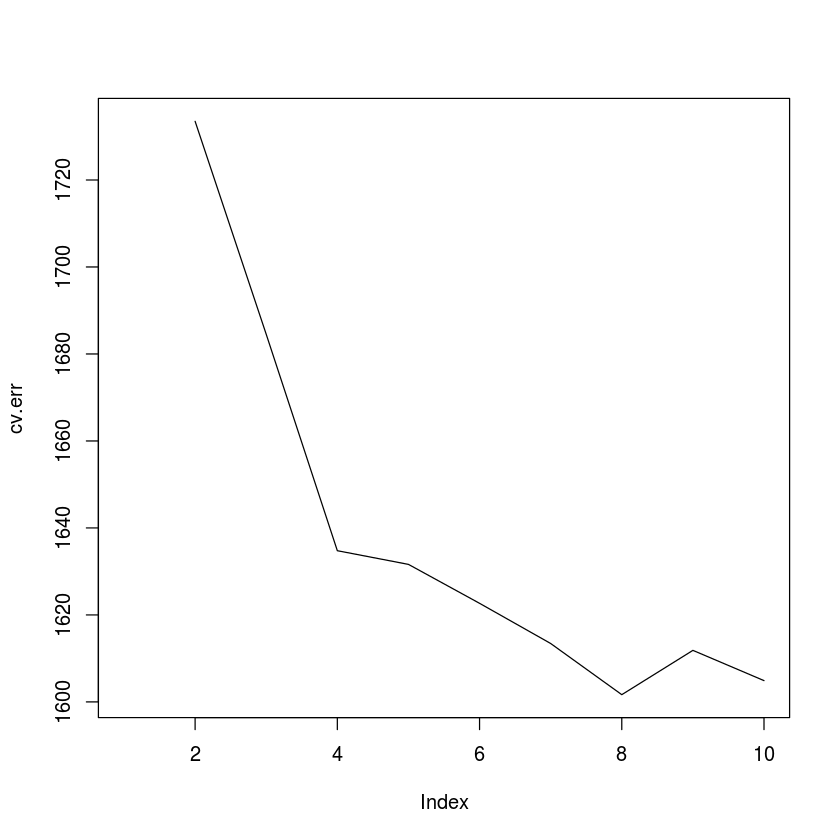

In [88]:
#The above k-fold cross validation can also be done with R's inbuilt function
cv.err = c()
for(i in 2:10){
    Wage$cuts = cut(Wage$age,i)
    glm.model = glm(wage~cuts, data=Wage)
    cv.err[i]=cv.glm(Wage,glm.model,K=10)$delta[2]
}
plot(cv.err,type="l")

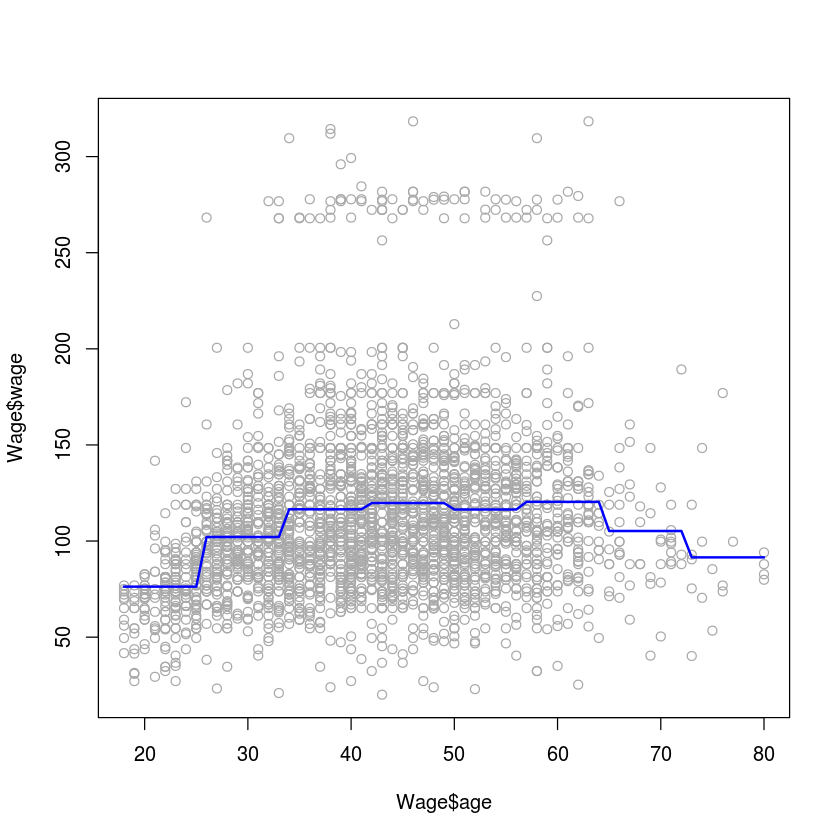

In [104]:
lm.model = lm(wage~cut(age,8),data=Wage)
lm.pred = predict(lm.model,newdata=list(age=age.range))
plot(Wage$age,Wage$wage,col="darkgrey")
lines(age.range,lm.pred,col="blue",lwd=2)